<img src="https://courses.edx.org/asset-v1:ACCA+ML001+2T2021+type@asset+block@acca-logo.jpg" alt="ACCA logo" style="width: 400px;"/>

# Machine learning with Python
## Part 1 - Classifier models - `Solutions` ✅

* **Course:** __Machine learning with Python for finance professionals__ by ACCA
* **Instructor:** [Coefficient](https://coefficient.ai) / [@CoefficientData](https://twitter.com/CoefficientData)

---

<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
RFM modelling dataset
</h2><br>
</div>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# 3k rows, 15 columns
df = pd.read_csv("RFM data - train.csv")
df.shape

(251, 12)

In [3]:
# Drop rows with missing data in critical columns
df = df.dropna(subset=['Frequency', 'Recency', 'Monetary'])

In [4]:
df.head()

,Membership ID,Country,City,Age,Gender,QTY,Frequency,Monetary,Recency,GST,Sum of Gross Bill Amount,Segment
0,MIDMY0049,Malaysia,Kuala Lumpur,48,Female,69,9,3332.0484,176.250000,0.06,3531.971304,VIP
1,MIDSG0475,Singapore,Bedok,45,Female,4,2,15.0092,784.000000,0.07,16.059844,At risk
2,MIDSG0115,Singapore,Bedok,22,Male,7,2,152.0244,838.000000,0.07,162.666108,At risk
3,MIDMY0400,Malaysia,Kuala Lumpur,43,Female,24,6,594.4224,140.200000,0.06,630.087744,VIP
4,MIDID0324,Indonesia,Jakarta,28,Female,55,7,2537.2180,155.833333,0.10,2790.939800,VIP


## What are the segments?
Review the chart below. It shows four pre-defined customer segments:
- **VIPs** are high value and/or active customers.
- **New** customers are lower value but active recently.
- **Passive** customers are more occasional, possibly high value but not active recently.
- **At risk** customers are low value and not seen for a while (possibly lost).

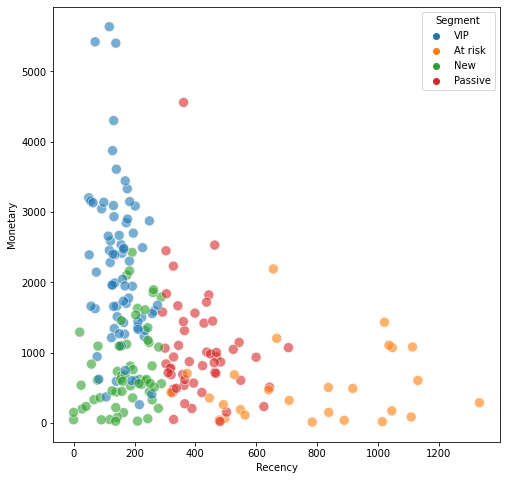

In [5]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Recency", y="Monetary", hue='Segment', s=100, alpha=0.6, data=df);

## Demo: Simple Classifier

### Sidenote: `.apply()` with rows
Our classifier will read in each row, one by one, and make decisions based on various columns within that row. Is `Recency` large? Is `Monetary` small?

We can use the pandas `.apply()` function to achieve this, by applying it to whole rows at a time.

In [6]:
# Previously we've seen .apply() used on a single column
df.Monetary.head(3)

0    3332.0484
1      15.0092
2     152.0244
Name: Monetary, dtype: float64

In [7]:
df.Monetary.apply(round).head(3)

0    3332
1      15
2     152
Name: Monetary, dtype: int64

However, we can use .apply() on the whole dataframe. What does the `.apply()` function get, the row or the column?

It depends! Pass `axis=0` for columns and `axis=1` for rows.

**Column totals**

In [8]:
df[['Frequency', 'Monetary']].head()

,Frequency,Monetary
0,9,3332.0484
1,2,15.0092
2,2,152.0244
3,6,594.4224
4,7,2537.2180


In [9]:
# .apply(sum, axis=0) applies the sum() function to each column, i.e. column totals
df[['Frequency', 'Monetary']].apply(sum, axis=0)

Frequency      1068.0000
Monetary     276447.0081
dtype: float64

**Row totals**

In [10]:
# .apply(sum, axis=1) applies the sum() function to each row, i.e. row totals
df[['Frequency', 'Monetary']].apply(sum, axis=1)

0      3341.0484
1        17.0092
2       154.0244
3       600.4224
4      2544.2180
         ...    
245    1278.4210
246    1461.3936
247    2167.3262
248    3152.6443
250     461.0933
Length: 213, dtype: float64

### Let's make a classifier

This is a very simple classifier that predicts that all customers seen more than 800 days ago are `At risk`. All other customers are classed as `VIP`.

This classifier will get:
1. **Some** of the `At risk` group correct ➡ _it gets 48% of these correct_
2. **All** of the `VIP` correct ➡ _it gets 100% of these correct_
3. **All other samples** incorrect! ➡ _it will score 0% on the other groups_

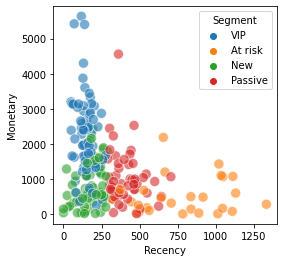

In [11]:
plt.figure(figsize=(4,4))
sns.scatterplot(x="Recency", y="Monetary", hue='Segment', s=100, alpha=0.6, data=df);

In [12]:
first_row = df.iloc[0]
first_row

Membership ID                  MIDMY0049
Country                         Malaysia
City                        Kuala Lumpur
Age                                   48
Gender                            Female
QTY                                   69
Frequency                              9
Monetary                       3332.0484
Recency                           176.25
GST                                 0.06
Sum of Gross Bill Amount     3531.971304
Segment                              VIP
Name: 0, dtype: object

In [13]:
def my_classifier(row):
    if row['Recency'] > 800:
        return 'At risk'
    else:
        return 'VIP'

In [14]:
my_classifier(first_row)

'VIP'

In [15]:
df.apply(my_classifier, axis=1)

0          VIP
1          VIP
2      At risk
3          VIP
4          VIP
        ...   
245        VIP
246        VIP
247        VIP
248        VIP
250        VIP
Length: 213, dtype: object

In [16]:
def my_classifier(row):
    if row['Recency'] > 800:
        return 'At risk'
    else:
        return 'VIP'

df['Predictions'] = df.apply(my_classifier, axis=1)
df['Correct'] = (df.Predictions == df.Segment)
df.head()

,Membership ID,Country,City,Age,Gender,QTY,Frequency,Monetary,Recency,GST,Sum of Gross Bill Amount,Segment,Predictions,Correct
0,MIDMY0049,Malaysia,Kuala Lumpur,48,Female,69,9,3332.0484,176.250000,0.06,3531.971304,VIP,VIP,True
1,MIDSG0475,Singapore,Bedok,45,Female,4,2,15.0092,784.000000,0.07,16.059844,At risk,VIP,False
2,MIDSG0115,Singapore,Bedok,22,Male,7,2,152.0244,838.000000,0.07,162.666108,At risk,At risk,True
3,MIDMY0400,Malaysia,Kuala Lumpur,43,Female,24,6,594.4224,140.200000,0.06,630.087744,VIP,VIP,True
4,MIDID0324,Indonesia,Jakarta,28,Female,55,7,2537.2180,155.833333,0.10,2790.939800,VIP,VIP,True


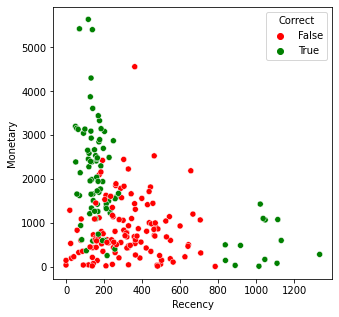

In [17]:
# You can see here which points were predicted correctly (green) vs incorrectly (red).
plt.figure(figsize=(5,5))
sns.scatterplot(x="Recency", y="Monetary", hue='Correct', palette=['red', 'green'], data=df);

In [18]:
# Accuracy = "what percent were correctly predicted?"
df.Correct.mean()

0.4084507042253521

In [19]:
# Using f-strings + formatting as a percentage to 1dp
print(f"Accuracy = {df.Correct.mean():.1%}")

Accuracy = 40.8%


In [20]:
# Can we break this accuracy out by segment?
df.groupby('Segment').Correct.mean()

Segment
At risk    0.481481
New        0.000000
Passive    0.000000
VIP        1.000000
Name: Correct, dtype: float64

---

> ### 🚩 Exercise...build a better classifier
> 1. Look at the RFM scatterplot above and try to build a function that classifies the data more accurately. Use if-else statements and pandas functions only.
> 2. Measure the accuracy of your classifier using the accuracy calculation above ("total correct over total samples").
> 3. Your classifier should be able to achieve well above 60% accuracy on this problem, above 70% is good, above 80% is very good.

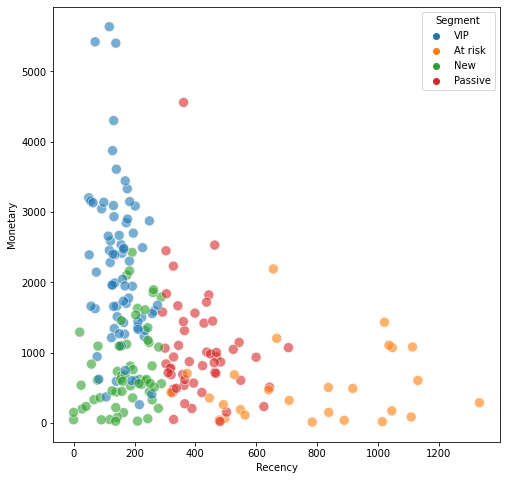

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Recency", y="Monetary", hue='Segment', s=100, alpha=0.6, data=df);

In [22]:
# ✅ SOLUTION


def my_classifier(row):
    if row['Recency'] > 560:
        return 'At risk'
    elif row['Recency'] > 290:
        return 'Passive'
    elif row['Monetary'] < 1200:
        return 'New'
    else:
        return 'VIP'

df['Predictions'] = df.apply(my_classifier, axis=1)
df['Correct'] = (df.Predictions == df.Segment)
df.head()

,Membership ID,Country,City,Age,Gender,QTY,Frequency,Monetary,Recency,GST,Sum of Gross Bill Amount,Segment,Predictions,Correct
0,MIDMY0049,Malaysia,Kuala Lumpur,48,Female,69,9,3332.0484,176.250000,0.06,3531.971304,VIP,VIP,True
1,MIDSG0475,Singapore,Bedok,45,Female,4,2,15.0092,784.000000,0.07,16.059844,At risk,At risk,True
2,MIDSG0115,Singapore,Bedok,22,Male,7,2,152.0244,838.000000,0.07,162.666108,At risk,At risk,True
3,MIDMY0400,Malaysia,Kuala Lumpur,43,Female,24,6,594.4224,140.200000,0.06,630.087744,VIP,New,False
4,MIDID0324,Indonesia,Jakarta,28,Female,55,7,2537.2180,155.833333,0.10,2790.939800,VIP,VIP,True


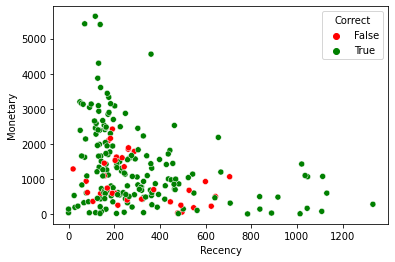

In [23]:
# You can see here which points were predicted correctly (green) vs incorrectly (red).
sns.scatterplot(x="Recency", y="Monetary", hue='Correct', palette=['red', 'green'], data=df);

In [24]:
# Accuracy = "what percent were correctly predicted?"
print(f"Accuracy = {df.Correct.mean():.1%}")

Accuracy = 84.0%


<div class="alert alert-block alert-warning">
<b><i class="fa fa-check-square" aria-hidden="true"></i>&nbsp; Reflect</b><br>

Consider the following questions before moving on:

1. How simple could this if-else classifier be while remaining relatively accurate?
<br/><br/>

2. How complicated could this if-else classifier be? Could you get to 100% accuracy, given enough if-else statements, and nested if-else statements? (The demo classifier used two if-else statements. What if we had 200? 2000?)
<br/><br/>

3. Which if-else classifier do you think might work better against new data that it hasn't yet seen? A simple classifier, your classifier, or a highly complex classifier that achieves high accuracy on an initial dataset? Why?

</div>


<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Testing classifiers on unseen data
</h2><br>
</div>

Let's test your classifier against data it hasn't yet seen. This dataset contains more samples from the same overall RFM dataset so it shares the same patterns and characteristics, just not the exact same data points.

In [25]:
# As before, drop rows with missing values in either the Recency, Frequency or Monetary columns.
df_test = (
    pd.read_csv("RFM data - test.csv")
    .dropna(subset=['Frequency', 'Recency', 'Monetary'])
)
df_test.shape

(2229, 12)

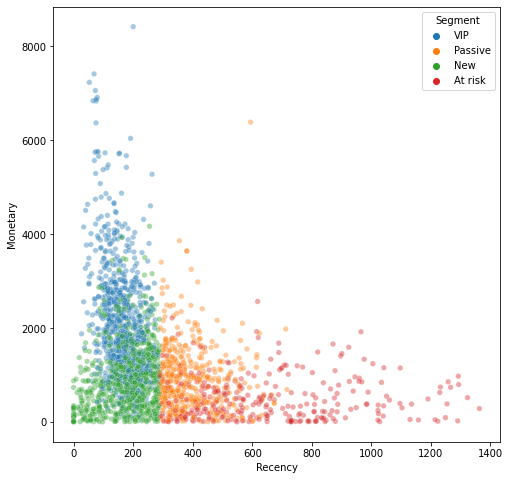

In [26]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Recency", y="Monetary", hue='Segment', s=30, alpha=0.4, data=df_test);

In [27]:
# Make predictions on the test dataset
df_test['Predictions'] = df_test.apply(my_classifier, axis=1)

# Calculate "test set accuracy"
df_test['Correct'] = (df_test.Predictions == df_test.Segment)

print(f"Test set accuracy = {df_test.Correct.mean():.1%}")

Test set accuracy = 75.0%


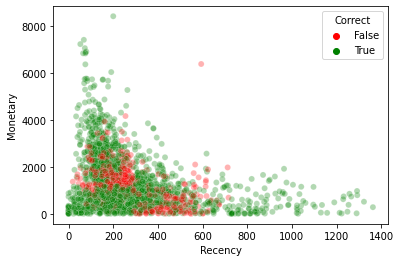

In [28]:
# These are the areas that were predicted correctly.
sns.scatterplot(x="Recency", y="Monetary", hue='Correct', palette=['red', 'green'], alpha=0.3, data=df_test);


<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Decision trees in scikit-learn
</h2><br>
</div>

<img src="https://courses.edx.org/asset-v1:ACCA+ML001+2T2021+type@asset+block@ml_map.png" alt="ML map" style="width: 800px;"/>

[scikit-learn](https://scikit-learn.org/stable/) is an open source library for machine learning in Python. It's built on top of NumPy and matplotlib so it works great with pandas DataFrames. It features a curated yet wide array of techniques for [supervised learning](https://scikit-learn.org/stable/supervised_learning.html) (classification and regression), [unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html) (clustering, dimensional reduction), [model tuning, validation & selection](https://scikit-learn.org/stable/model_selection.html#model-selection) as well as handy utilities for [preprocessing datasets](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).

scikit-learn is a production-grade tool for machine learning and is [one of the most popular machine learning libraries on GitHub](https://github.blog/2019-01-24-the-state-of-the-octoverse-machine-learning/) behind [TensorFlow](https://www.tensorflow.org/) which is primarily designed for working with [deep learning models](https://en.wikipedia.org/wiki/Deep_learning). For tabular datasets (i.e. not images or sound) that are relatively "small" (as a rough benchmark, define "small" as half your computer's RAM memory, so anything up to 4GB is considered small), scikit-learn is the ideal tool for the job.

---

We're going to start working with Decision Trees in scikit-learn. To learn more, check out the excellent [user guide for decision trees](https://scikit-learn.org/stable/modules/tree.html) on the scikit-learn documentation site.

In [29]:
# scikit-learn is easy to typo...so they import from "sklearn" instead

# We will need a few modules for the next sections. A module is just a file that contains functions.
from sklearn import model_selection, tree

In [30]:
# Construct input (pandas DataFrame) & target output (pandas Series)
X = df[['Recency', 'Monetary']]
y = df.Segment

# Repeat for the test set
X_test = df_test[['Recency', 'Monetary']]
y_test = df_test.Segment

In [31]:
# Fit the model
model = tree.DecisionTreeClassifier().fit(X, y)

In [32]:
# Evaluate the model
df['Predictions'] = model.predict(X)
df['Correct'] = (df.Predictions == y)
print(f"Training set accuracy = {df.Correct.mean():.1%}")

Training set accuracy = 100.0%


In [33]:
# Evaluate the model by calculating the test set accuracy

# First, make some predictions for the test set
df_test['Predictions'] = model.predict(X_test)

# Second, note down which we got correct
df_test['Correct'] = (df_test.Predictions == y_test)

# Finally, calculate the accuracy
print(f"Test set accuracy = {df_test.Correct.mean():.1%}")

Test set accuracy = 70.6%


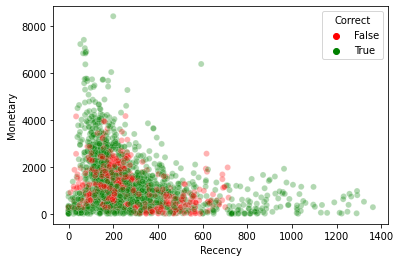

In [34]:
# Let's see which areas were predicted correctly by the decision tree.
sns.scatterplot(x="Recency", y="Monetary", hue='Correct', palette=['red', 'green'], alpha=0.3, data=df_test);

Let's summarise the situation:

| Model | Complexity | Training Dataset Accuracy | Test Dataset Accuracy |
| -- | -- | -- | -- |
| Rule-based classifier (demo) | Low | 40.8% | 40.2% |
| Rule-based classifier (our solution code) | Medium | 84% | 75% |
| Decision Tree classifier | High | 100% | 70.2% |


<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Visualising decision trees
</h2><br>
</div>

If you right-click on the generated figure below, you can then either download it or open it in a new browser tab. Either of these options should allow you to then zoom in on the detail of the decision tree's individual nodes and split criteria.

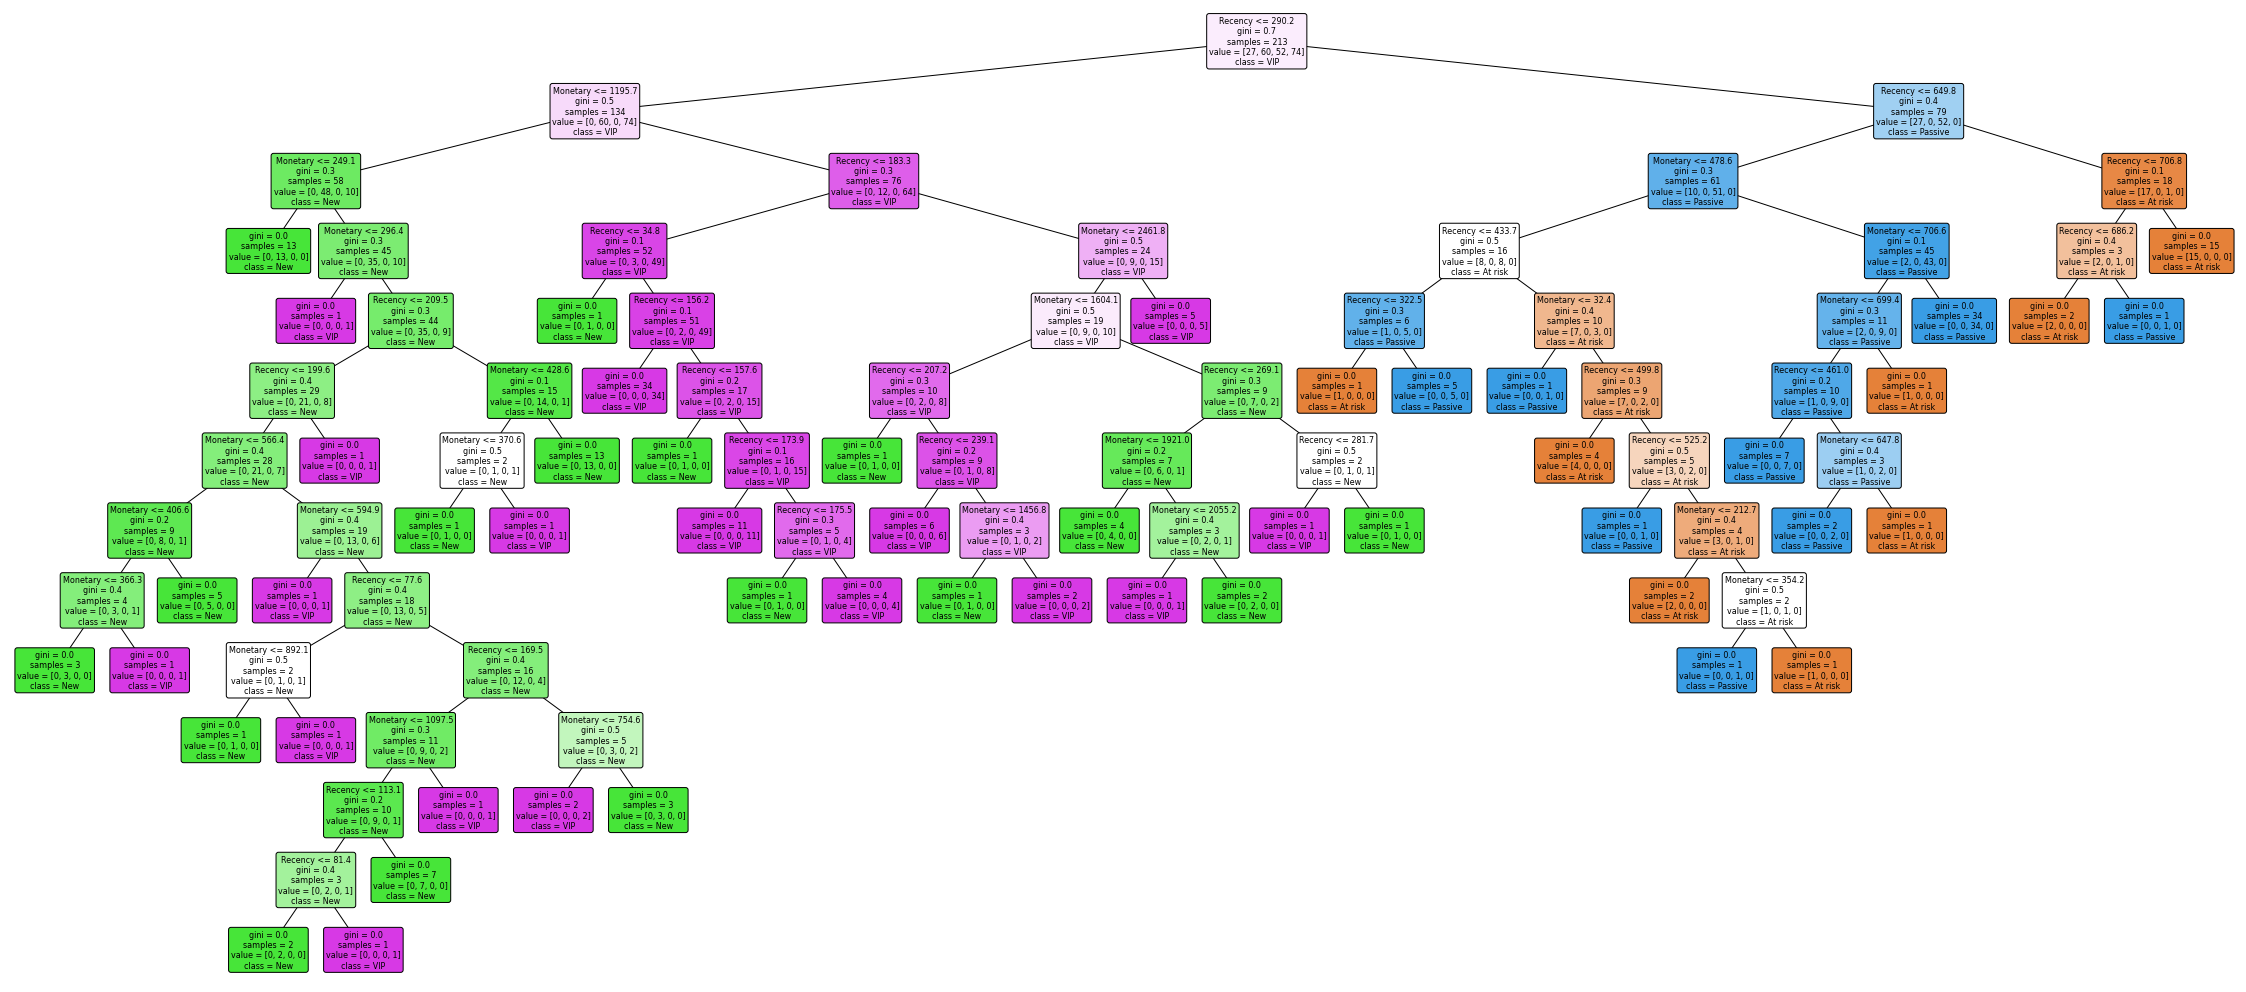

In [35]:
plt.figure(figsize=(40, 18))

tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=['At risk', 'New', 'Passive', 'VIP'],
    filled=True,
    rounded=True,
    precision=1,
    fontsize=8,
);

Let's zoom in on the very top of this tree.

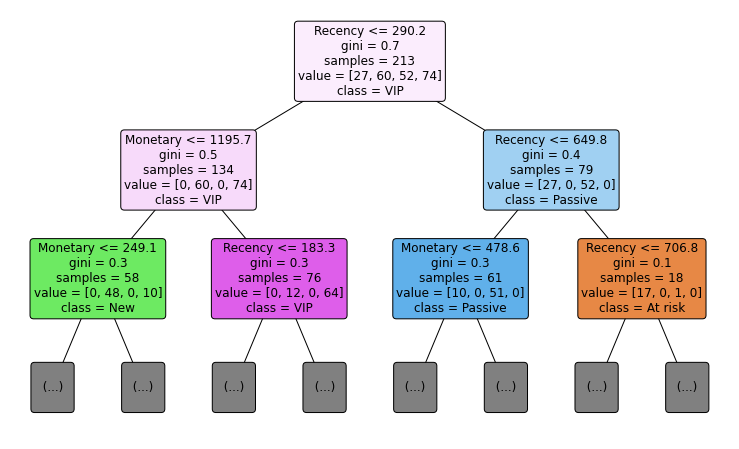

In [36]:
plt.figure(figsize=(13, 8))

tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=['At risk', 'New', 'Passive', 'VIP'],
    filled=True,
    rounded=True,
    fontsize=12,
    precision=1,
    max_depth=2,
);

Reviewing the original training data (copied below), does this make sense?

1. The first split asks: **Is `Recency` < 290?**
2. If `Recency < 290`, go left and ask: **Is `Monetary` < 1196?**
  - If `Monetary < 1196`, predict we're likely `New`.
  - If `Montary > 1196`, predict we're likely `VIP`.
3. If `Recency > 290`, go right and ask: **Is `Recency` < 650?**
  - If `Recency < 650`, predict we're likely `Passive`.
  - If `Recency > 650`, predict we're likely `At risk`.

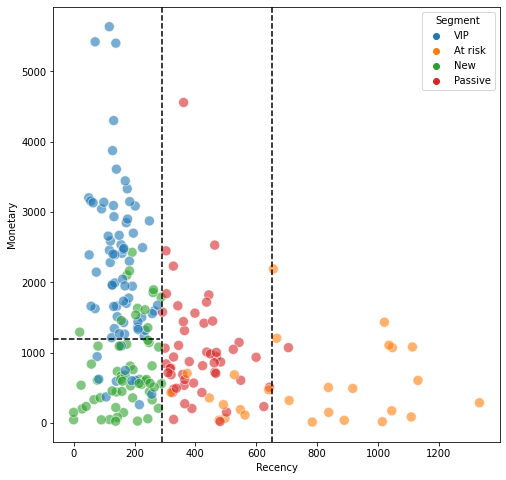

In [37]:
plt.figure(figsize=(8,8))
graph = sns.scatterplot(x="Recency", y="Monetary", hue='Segment', s=100, alpha=0.6, data=df);

# Let's add the splits visually below
graph.axvline(290, color='black', linestyle='--')   # Recency < 290?
graph.axvline(650, color='black', linestyle='--')   # Recency < 650?
graph.axhline(y=1196, xmin=0, xmax=.24, color='black', linestyle='--')  # Monetary < 1196?

<div class="alert alert-block alert-warning">
<b><i class="fa fa-check-square" aria-hidden="true"></i>&nbsp; Check</b><br>

Go back and check your if-else based solution to this problem. How does it compare to the splits derived automatically by the DecisionTreeClassifier?


<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Cross-validation
</h2><br>
</div>

In [38]:
# Let's combine our training & test data into a single dataset.

# We add the if-condition to prevent duplication of data in
# case you run the cell multiple times.
if len(df) < 500:
    df = pd.concat([df, df_test], axis=0)
    
df.shape

(2442, 14)

In [39]:
df.head()

,Membership ID,Country,City,Age,Gender,QTY,Frequency,Monetary,Recency,GST,Sum of Gross Bill Amount,Segment,Predictions,Correct
0,MIDMY0049,Malaysia,Kuala Lumpur,48,Female,69,9,3332.0484,176.250000,0.06,3531.971304,VIP,VIP,True
1,MIDSG0475,Singapore,Bedok,45,Female,4,2,15.0092,784.000000,0.07,16.059844,At risk,At risk,True
2,MIDSG0115,Singapore,Bedok,22,Male,7,2,152.0244,838.000000,0.07,162.666108,At risk,At risk,True
3,MIDMY0400,Malaysia,Kuala Lumpur,43,Female,24,6,594.4224,140.200000,0.06,630.087744,VIP,VIP,True
4,MIDID0324,Indonesia,Jakarta,28,Female,55,7,2537.2180,155.833333,0.10,2790.939800,VIP,VIP,True


---

> ### 🚩 Exercise
> 
> Let's run through the basic pattern of using sklearn, this time with the full 2442 rows in the combined `df` dataframe:
> 1. Recreate the input dataframe, `X` and the target Series, `y`. This code will be unchanged from before, so just copy it in. We don't need to worry about a test set this time.
> 2. Fit a `DecisionTreeClassifier` model to `X` and `y`. This means we're asking the classifier to learn how to predict `y` (the target) given the input `X` (the input).
> 3. Instead of generating predictions, counting which were correct, and calculating the accuracy by hand... just call `model.score(X, y)` to do this all in one go. This is the model's "training set accuracy".

In [40]:
# ✅ SOLUTION

# 1. Create X and y
X = df[['Recency', 'Monetary']]
y = df.Segment

In [41]:
# ✅ SOLUTION

# 2. Fit the model
model = tree.DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [42]:
# ✅ SOLUTION

# 3. Calculate the training set accuracy
model.score(X, y)

1.0

---

### `train_test_split()`
Previously you were given a training set and a test set. How did we make this? Let's find out.

In [43]:
# This creates a small training set (10% of df) and a large test set (90% of df)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.9)

In [44]:
# X_train is a pandas DataFrame with 244 rows and 2 columns
X_train.shape

(244, 2)

In [45]:
# X_test is a pandas DataFrame with 2198 rows and 2 columns
X_test.shape

(2198, 2)

In [46]:
# y_train is a pandas Series with 244 rows and no columns (Series don't have columns)
y_train.shape

(244,)

In [47]:
# y_train is a pandas Series with 2198 rows and no columns
y_test.shape

(2198,)

<div class="alert alert-block alert-warning">
<b><i class="fa fa-check-square" aria-hidden="true"></i>&nbsp; Check</b><br>

Make sure you follow along with the idea of creating a training set and a test set here, and that you understand the required shape for <code>X</code> and <code>y</code>. A <em>very</em> common mistake when using scikit-learn is to try to supply something other than a DataFrame for X, and something other than a Series for y.
</div>

In [48]:
# Let's calculate cross-validated accuracy (in just two lines of code!)

# First, we fit to the training data
model = tree.DecisionTreeClassifier().fit(X_train, y_train)

# Second, we can calculate the accuracy directly using the .score() method
model.score(X_test, y_test)

0.7156505914467698

<div class="alert alert-block alert-warning">
<b><i class="fa fa-check-square" aria-hidden="true"></i>&nbsp; Check</b><br>

There's a lot going on here. The process is always the same in machine learning:

<ol>
    <li>Divide your data into train set and test set.</li>
    <li>Fit a model to your training data (<code>X_train</code> and <code>y_train</code>).</li>
    <li>Make predictions for the unseen dataset <code>X_test</code>.</li>
    <li>Compare those predictions with the answers, <code>y_test</code>.</li>
    <li>Score it up using a metric such as overall accuracy on the test set.</li>
</ol>
    
If you need another perspective, <a href="https://radiopublic.com/data-skeptic-6VVqb6/s1!f1bc6">this mini-podcast episode is a great accessible primer on cross-validation</a>.
</div>

---

### k-fold cross-validation
Like most things in scikit-learn, you don't need to write your own code for this, k-fold cross-validation a built-in function.

In [49]:
# Let's apply a 5-fold cross-validation
scores = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy')
scores

array([0.6993865 , 0.72597137, 0.69672131, 0.67622951, 0.68442623])

In [50]:
# What's the average accuracy across all five folds?
scores.mean()

0.6965469844781923

This is our "gold standard" validation for this problem. If the model is under-fitting or over-fitting, it won't generalise well to the test set and will perform poorly in the k-fold cross-validation process.

It's likely that our DecisionTreeClassifier is overfitting due to overcomplexity. Let's try reducing the complexity of this decision tree by setting `max_depth=2` (we will explain what this means shortly).

In [51]:
# Set max_depth=2 and re-run the cross-validation scoring.
model = tree.DecisionTreeClassifier(max_depth=2).fit(X, y)
scores = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy')
scores.mean()

0.741193972308827

By tinkering with the `max_depth` argument (a.k.a. "hyperparameter") we improved our model. This is a real improvement too, remember, we're using a gold standard validation technique.

---

> ### 🚩 Exercise
> **What is the optimal `max_depth` hyperparameter for this problem?**
> 
> 1. First, use a for loop to iterate over a range of values from 1 to 30 (don't forget to exclude 0).
> 
> 2. At each point, save the `max_depth` value as well as the mean cross-validated accuracy for that decision tree. We've provided an example below on how to save data from for loops into a list of dictionaries. Remember, it's trivial to turn a list of dictionaries into a pandas dataframe.
> 
> 3. Plot `accuracy` (y-axis) vs `max_depth` (x-axis) using Seaborn's **[`lineplot()`](https://seaborn.pydata.org/generated/seaborn.lineplot.html)** function.
> 
> 4. Looking at your plot (or the dataframe of results directly), which value of `max_depth` maximises cross-validated accuracy for this problem?

#### Saving data from for loops
First, a quick reminder on a handy pattern for saving data from loops:
1. Initialise an empty list ready to hold some data
2. Use a `for` loop to iterate through a list
3. Append some data into the empty list
4. A list of dictionaries converts quite nicely into a DataFrame
5. We can then use Seaborn to visualise the DataFrame.

Here we are visualising the formula: $$y = 2^i - i^3$$

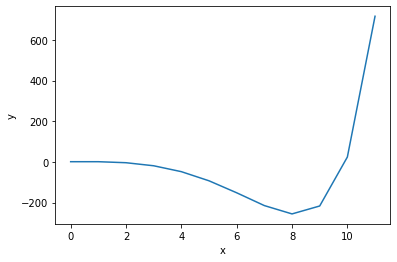

In [52]:
# Demo: plotting numbers
data_list = []
for i in range(12):
    data_list.append({
        'x': i,
        'y': (2**i) - (i**3),
    })

data = pd.DataFrame(data_list)
sns.lineplot(x='x', y='y', data=data);

Use the loop above as a starting point, but instead saving the accuracy for a model with the specified `max_depth`.

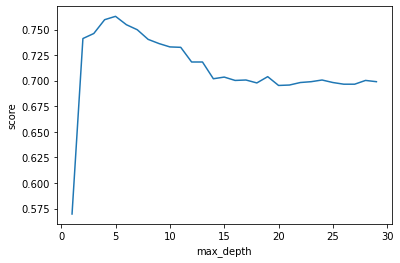

In [53]:
# ✅ SOLUTION

# Use a for loop to iterate over a range of values from 1 to 30
# (don't forget to exclude 0). At each point, save the max_depth value
# as well as the mean cross-validated accuracy for that decision tree.

data_list = []
for max_depth in range(1, 30):
    model = tree.DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
    score = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    data_list.append({
        'max_depth': max_depth,
        'score': score
    })

data = pd.DataFrame(data_list)
sns.lineplot(x='max_depth', y='score', data=data);

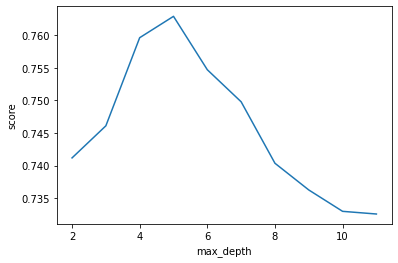

In [54]:
# ✅ SOLUTION

# Plot accuracy (y-axis) vs max_depth (x-axis) using Seaborn's lineplot() function.

sns.lineplot(x='max_depth', y='score', data=data.query("score > 0.73"));

In [55]:
# ✅ SOLUTION

# Looking at your plot (or the dataframe of results directly), which value of
# max_depth maximises cross-validated accuracy for this problem?

data.sort_values('score', ascending=False).head()

,max_depth,score
4,5,0.762900
3,4,0.759624
5,6,0.754711
6,7,0.749798
2,3,0.746115


---

> ### 🚩 Exercise
> Fit a DecisionTreeClassifier with your optimised max_depth to the whole dataset (`X` and `y`).
> 
> Using the code provided earlier, visualise this optimised decision tree.

In [56]:
# ✅ SOLUTION

# Fit the model to the whole dataset.
model = tree.DecisionTreeClassifier(max_depth=5).fit(X, y)

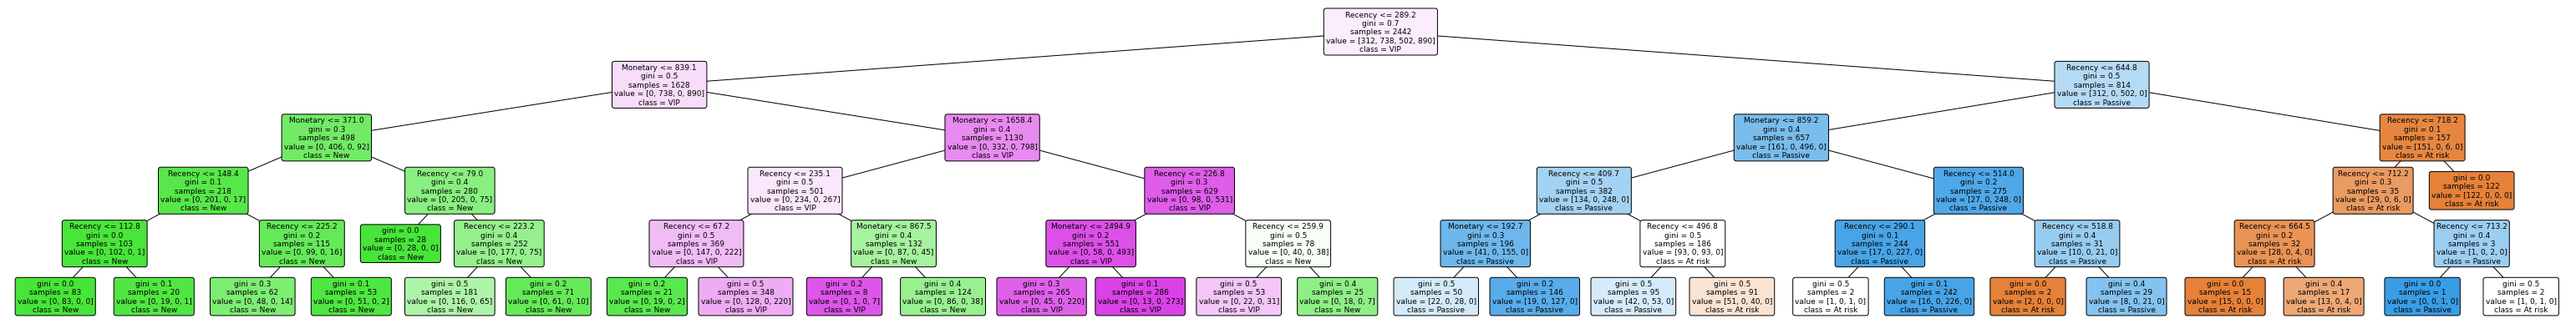

In [57]:
# ✅ SOLUTION

# Visualise this "best case" model.
plt.figure(figsize=(55, 7))

tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=['At risk', 'New', 'Passive', 'VIP'],
    filled=True,
    rounded=True,
    fontsize=9,
    precision=1,
);


<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Random Forests
</h2><br>
</div>

Random Forests are an example of a machine learning [ensemble technique](https://scikit-learn.org/stable/modules/ensemble.html). Many other ensemble methods exist for constructing ensembles of "base classifiers" with various voting mechanisms. [Read more about ensemble methods in scikit-learn here](https://scikit-learn.org/stable/modules/ensemble.html).

In [58]:
from sklearn import ensemble

In [59]:
# Let's try a default random forest
model = ensemble.RandomForestClassifier().fit(X, y)
model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

0.7518354621341647

This is pretty good, 75% cross-validated accuracy is already equivalent to our optimally tuned decision tree! Maybe we can do even better if we tune our random forest?

---

> ### 🚩 Exercise
> Copy your hyperparameter tuning code from earlier, and identify the best `n_estimators` for a `RandomForestClassifier` for this problem. You should assume `max_depth=5`, i.e. assuming your for loop references `n_estimators` in some range:
> 
> ```python
> model = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=5).fit(X, y)
> ```
> 
> Tip: don't use `range()` here, it will be needlessly slow. Instead try iterating over just the following values in your for loop: `[1, 5, 10, 20, 30, 40, 50, 60, 75, 100, 150]`.

In [60]:
from tqdm import tqdm

100%|██████████| 17/17 [00:19<00:00,  1.15s/it]


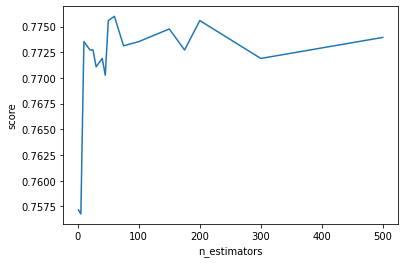

In [61]:
# ✅ SOLUTION

data_list = []
for n_estimators in tqdm([1, 5, 10, 20, 25, 30, 40, 45, 50, 60, 75, 100, 150, 175, 200, 300, 500]):
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=5).fit(X, y)
    score = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    data_list.append({
        'n_estimators': n_estimators,
        'score': score
    })

data = pd.DataFrame(data_list)
sns.lineplot(x='n_estimators', y='score', data=data);

In [62]:
data.score.max()

0.7759965134600556

In [63]:
data.score.argmax()

9

In [64]:
data.loc[data.score.argmax()]

n_estimators    60.000000
score            0.775997
Name: 9, dtype: float64

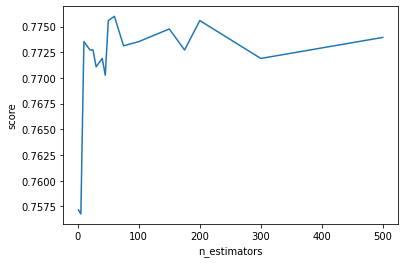

In [65]:
sns.lineplot(x='n_estimators', y='score', data=data.query('score > .75'));

> 77% - not bad for a tricky problem! There's a lot more parameters we could play around with and optimise (you can see all the [hyperparameters of scikit-learn's `RandomForestClassifier()` here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), but we'll leave this for now. Which feature is more important?

In [66]:
model = ensemble.RandomForestClassifier(n_estimators=45, max_depth=5).fit(X, y)

In [67]:
X.columns

Index(['Recency', 'Monetary'], dtype='object')

In [68]:
model.feature_importances_

array([0.69663488, 0.30336512])

In [69]:
# Extracting importance of features
features = X.columns
feature_importances = model.feature_importances_

features_df = (
    pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
    .sort_values(by='Importance Score', ascending=False)
)

features_df

,Features,Importance Score
0,Recency,0.696635
1,Monetary,0.303365


<AxesSubplot:xlabel='Features', ylabel='Importance Score'>

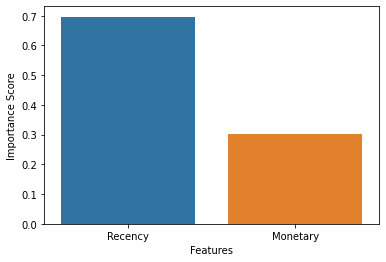

In [70]:
sns.barplot(data=features_df, x='Features', y='Importance Score')

This tells us that `Recency` is the major driver of segment classification, far more than `Monetary`. This makes sense, given the scatterplots we saw earlier which differentiated mostly along the `Recency` axis with `Monetary` only really making a difference to differentiate between `VIP` and `New`.


<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
The RFM Model
</h2><br>
</div>

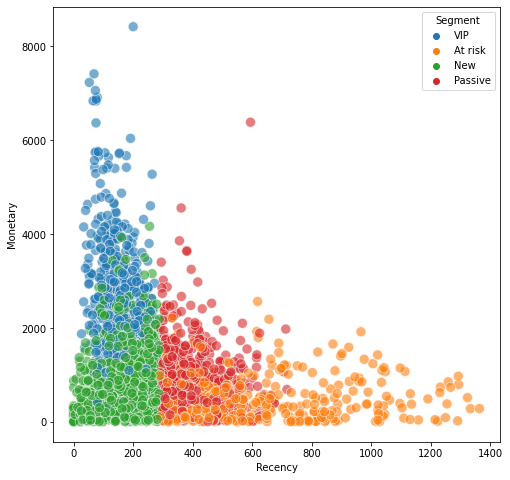

In [71]:
plt.figure(figsize=(8,8))
graph = sns.scatterplot(x="Recency", y="Monetary", hue='Segment', s=100, alpha=0.6, data=df);

So far we've been trying to reverse engineer an [RFM segmentation](https://clevertap.com/blog/rfm-analysis/) which was determined using a rule-based system. Here is the original RFM analysis for this company.

<table>
    <tr>
        <td>
            <img src="https://courses.edx.org/asset-v1:ACCA+ML001+2T2021+type@asset+block@rfm.png" alt="RFM heatmap" style="width: 400px;"/>
        </td>
        <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
        <td>
            <img src="https://courses.edx.org/asset-v1:ACCA+ML001+2T2021+type@asset+block@rfm.jpg" alt="RFM matrix" style="width: 400px;"/>
        </td>
    </tr>
</table>

| Metric | Description | Low | High |
| -- | -- | -- | -- |
| `Fscore` | Frequency score | Low frequency, e.g. customers visit once/year | High frequency, e.g. daily visits |
| `Rscore` | Recency score | Low recency, e.g. customers not seen for a while | High recency, e.g. seen today |
| `Mscore` | Monetary score (cell colour) | Red = low percentage of total revenue | Green = high percentage of total revenue |

This RFM model suggests that:
1. **High frequency customers are generating the most revenue**.
  - These are top-row customers in the above plot.
  - Treat like `VIPs` and target for further monetisation, regardless of recency.
  - There are no high-frequency low-recency customers, hence no revenue; this makes sense intuitively.
2. **Medium frequency low recency customers shouldn't be ignored.**
  - These are middle-left in the plot above.
  - These are loyal `Passive` customers and require a different CRM strategy to VIPs.
3. **Medium-to-high recency + low-to-medium frequency => new customers.**
  - This is a large block in the bottom-right four squares of the plot above.
  - Target habit formation and shifting customers up & towards the right towards the `VIPs`.

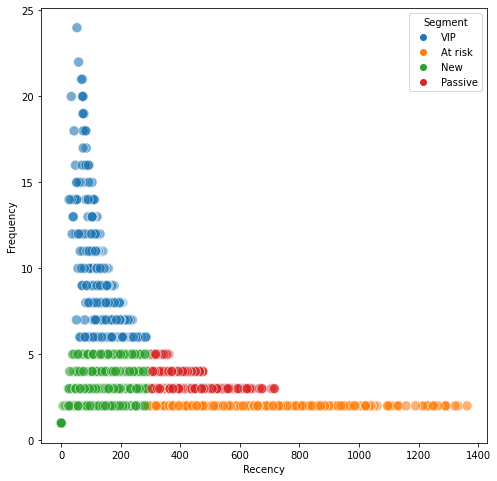

In [72]:
plt.figure(figsize=(8,8))
graph = sns.scatterplot(x="Recency", y="Frequency", hue='Segment', s=100, alpha=0.6, data=df);

---
<div class="alert alert-block alert-info">
    <b>Please proceed to the next part of the course when you are ready.</b>
</div>